In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('FoodPrice_in_Turkey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


1. Với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg

In [41]:
product_name = list(df['ProductName'].unique())
product_name

['Rice - Retail',
 'Wheat flour - Retail',
 'Beans (white) - Retail',
 'Potatoes - Retail',
 'Eggs - Retail',
 'Meat (chicken) - Retail',
 'Sugar - Retail',
 'Garlic - Retail',
 'Lentils - Retail',
 'Pasta - Retail',
 'Tomatoes - Retail',
 'Groundnuts (shelled) - Retail',
 'Bread (common) - Retail',
 'Coffee - Retail',
 'Onions - Retail',
 'Tea (green) - Retail',
 'Cabbage - Retail',
 'Meat (mutton) - Retail',
 'Oil (sunflower) - Retail',
 'Salt - Retail',
 'Coffee (instant) - Retail',
 'Peas (green, dry) - Retail',
 'Apples (red) - Retail',
 'Cauliflower - Retail',
 'Cucumbers (greenhouse) - Retail',
 'Oil (olive) - Retail',
 'Chickpeas - Retail',
 'Bananas - Retail',
 'Bulgur - Retail',
 'Tea - Retail',
 'Fuel (petrol-gasoline) - Retail',
 'Transport (public) - Retail',
 'Tomatoes (paste) - Retail',
 'Fuel (gas) - Retail',
 'Apples - Retail',
 'Oranges - Retail',
 'Yogurt - Retail',
 'Bread (pita) - Retail',
 'Cucumbers - Retail',
 'Fish (fresh) - Retail',
 'Spinach - Retail',
 'Chee

In [42]:
df_rice = df[(df['ProductName']=='Rice - Retail') & (df['Year']==2019)]
df_rice.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
54,National Average,52,Rice - Retail,5,KG,1,2019,8.4275
55,National Average,52,Rice - Retail,5,KG,2,2019,8.7656
56,National Average,52,Rice - Retail,5,KG,3,2019,8.8101
57,National Average,52,Rice - Retail,5,KG,4,2019,8.9266
58,National Average,52,Rice - Retail,5,KG,5,2019,9.1866


In [43]:
print (f'Số lượng bản ghi của gạo năm 2019: {df_rice.shape[0]}')

Số lượng bản ghi của gạo năm 2019: 48


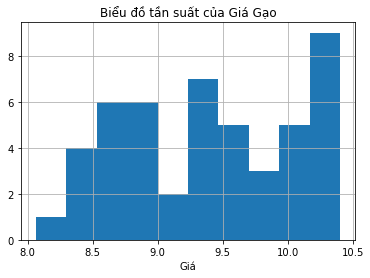

In [44]:
df_rice['Price'].hist()
plt.title('Biểu đồ tần suất của Giá Gạo')
plt.xlabel('Giá');

Giá gạo có xu hướng gần giống phân phối chuẩn, nên thực hiện kiểm định 2 phía với one sample ttest

- H0: Giá gạo trung bình năm 2019 bằng 10 lira
- H1: Giá gạo trung bình năm 2019 không bằng 10 lira

In [45]:
stats.ttest_1samp(df_rice['Price'], 10)

Ttest_1sampResult(statistic=-6.319885434592856, pvalue=8.812949954818996e-08)

pvalue < 0.05 -> Bác bỏ H0, vậy giá gạo trung bình năm 2019 khác 10 lira

2. Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

In [46]:
df_wheat = df[(df['ProductName']=='Wheat flour - Retail') & (df['Year']==2019)]
df_wheat.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
120,National Average,58,Wheat flour - Retail,5,KG,1,2019,3.5069
121,National Average,58,Wheat flour - Retail,5,KG,2,2019,3.4963
122,National Average,58,Wheat flour - Retail,5,KG,3,2019,3.5575
123,National Average,58,Wheat flour - Retail,5,KG,4,2019,3.6129
124,National Average,58,Wheat flour - Retail,5,KG,5,2019,3.5917


In [47]:
print (f'Số lượng bản ghi của bột mỳ năm 2019: {df_wheat.shape[0]}')

Số lượng bản ghi của bột mỳ năm 2019: 48


<AxesSubplot:>

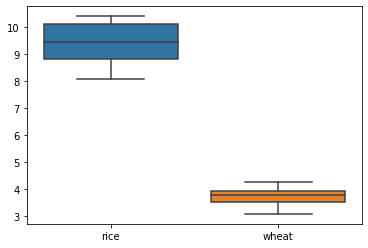

In [48]:
import seaborn as sns
price = {'rice': list(df_rice['Price']), 'wheat':list(df_wheat['Price'])}
df_price = pd.DataFrame(price)
sns.boxplot(data=df_price)

Nhìn vào ta thấy giá bột mì thấp hơn giá gạo. Ta cần làm kiểm định để so sánh giá của hai loại có giống nhau hay không?

- H0: Giá bột mỳ trung bình bằng giá gạo trung bình
- H1: Giá trung bình của cả 2 loại không bằng nhau

In [49]:
stats.ttest_ind(df_price['rice'], df_price['wheat'])

Ttest_indResult(statistic=53.751692036304206, pvalue=2.226692642717799e-72)

pvalue < 0.05 -> bác bỏ H0, Giá trung bình của cả 2 loại không bằng nhau

3. Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

In [50]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [51]:
df['Time'] = pd.to_datetime(df['Year'].astype(str) + '/' + df['Month'].astype(str))
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,Time
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,2013-05-01
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,2013-06-01
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,2013-11-01
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,2013-12-01
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,2014-01-01


In [56]:
Tea_all = df[df['ProductName']=='Tea - Retail']
df_tea_by_month = Tea_all.groupby('Time')['Price'].mean()
df_tea_by_month

Time
2013-05-01    14.020100
2013-06-01    14.000300
2013-11-01    14.192100
2013-12-01    14.399100
2014-01-01    15.207200
                ...    
2019-08-01    29.407575
2019-09-01    31.928875
2019-10-01    32.427200
2019-11-01    32.442000
2019-12-01    32.366525
Name: Price, Length: 75, dtype: float64

In [57]:
coffee_all = df[df['ProductName']=='Coffee - Retail']
coffee_all_by_month = coffee_all.groupby('Time')['Price'].mean()
coffee_all_by_month

Time
2013-05-01    30.893700
2013-06-01    31.016400
2013-11-01    30.744500
2013-12-01    30.907900
2014-01-01    31.260700
                ...    
2019-08-01    47.719150
2019-09-01    48.352750
2019-10-01    47.993300
2019-11-01    48.244925
2019-12-01    48.437275
Name: Price, Length: 75, dtype: float64

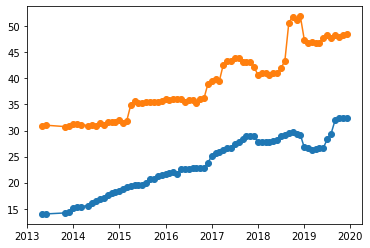

In [61]:
plt.plot_date(df_tea_by_month.index, df_tea_by_month.values, linestyle='solid')
plt.plot_date(coffee_all_by_month.index, coffee_all_by_month.values, linestyle='solid')

In [62]:
df_tea_coffee = pd.DataFrame(df[df['ProductName'].isin(['Tea - Retail', 'Coffee - Retail'])])
df_tea_coffee.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,Time
838,National Average,151,Coffee - Retail,5,KG,5,2013,30.8937,2013-05-01
839,National Average,151,Coffee - Retail,5,KG,6,2013,31.0164,2013-06-01
840,National Average,151,Coffee - Retail,5,KG,11,2013,30.7445,2013-11-01
841,National Average,151,Coffee - Retail,5,KG,12,2013,30.9079,2013-12-01
842,National Average,151,Coffee - Retail,5,KG,1,2014,31.2607,2014-01-01


In [64]:
df_tea_coffee['Time-Place'] = df_tea_coffee['Time'].astype(str) + '-' + df_tea_coffee['Place'].astype(str)
df_tea_coffee.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,Time,Time-Place
838,National Average,151,Coffee - Retail,5,KG,5,2013,30.8937,2013-05-01,2013-05-01-National Average
839,National Average,151,Coffee - Retail,5,KG,6,2013,31.0164,2013-06-01,2013-06-01-National Average
840,National Average,151,Coffee - Retail,5,KG,11,2013,30.7445,2013-11-01,2013-11-01-National Average
841,National Average,151,Coffee - Retail,5,KG,12,2013,30.9079,2013-12-01,2013-12-01-National Average
842,National Average,151,Coffee - Retail,5,KG,1,2014,31.2607,2014-01-01,2014-01-01-National Average


In [68]:
df_tea = df_tea_coffee[df_tea_coffee['ProductName']=='Tea - Retail'].filter(['Time-Place', 'Price'])
df_tea.columns = ['Time-Place', 'Tea Price']
df_tea

,Time-Place,Tea Price
1701,2013-05-01-National Average,14.0201
1702,2013-06-01-National Average,14.0003
1703,2013-11-01-National Average,14.1921
1704,2013-12-01-National Average,14.3991
1705,2014-01-01-National Average,15.2072
...,...,...
6685,2019-08-01-Izmir,31.5816
6686,2019-09-01-Izmir,34.5236
6687,2019-10-01-Izmir,35.4092
6688,2019-11-01-Izmir,35.4751


In [71]:
df_coffee = df_tea_coffee[df_tea_coffee['ProductName']=='Coffee - Retail'].filter(['Time-Place', 'Price'])
df_coffee.columns = ['Time-Place', 'Coffee price']
df_coffee.head()

,Time-Place,Coffee price
838,2013-05-01-National Average,30.8937
839,2013-06-01-National Average,31.0164
840,2013-11-01-National Average,30.7445
841,2013-12-01-National Average,30.9079
842,2014-01-01-National Average,31.2607


In [73]:
processed_data = pd.merge(df_tea, df_coffee, on='Time-Place')
processed_data.head()

,Time-Place,Tea Price,Coffee price
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


- H0: Giá Cà phê bằng giá Trà công thêm 15 Lira ở mọi thời điểm
- H1: Giá Cà phê luôn hơn giá Trà 15 Lira ở mọi thời điểm

In [77]:
d = processed_data['Coffee price'] - processed_data['Tea Price'] - 15
stats.wilcoxon(d, alternative='greater')

WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

pvalue < 0.01 -> Bác bỏ H0, Giá Cà phê luôn lớn hơn giá Trà ít nhất 15 Lira mà không bị ảnh hưởng bởi thời gian hay địa điểm